In [ ]:
# ========================================
# STEP 1: CHECK CURRENT DIRECTORY
# ========================================

import os

print("Current directory:", os.getcwd())
print("\nFiles/folders in current directory:")
for item in os.listdir('.'):
    print(f"  {'📁' if os.path.isdir(item) else '📄'} {item}")

Current directory: /content

Files/folders in current directory:
  📁 .config
  📁 sample_data


In [ ]:
# ========================================
# STEP 2: UPLOAD AND EXTRACT
# ========================================

from google.colab import files
import zipfile
import os

# Upload the file
print("Please upload dev_phase.zip:")
uploaded = files.upload()

# Check what was uploaded
print("\nUploaded files:")
for filename in uploaded.keys():
    print(f"  {filename} ({len(uploaded[filename])} bytes)")

# Extract the zip
print("\nExtracting...")
with zipfile.ZipFile('dev_phase.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
    print(" Extracted!")

# Check what's there now
print("\n📁 Files/folders after extraction:")
for item in sorted(os.listdir('.')):
    if os.path.isdir(item):
        print(f"  {item}/")
    else:
        size = os.path.getsize(item)
        print(f"  {item} ({size:,} bytes)")

Please upload dev_phase.zip:


Saving dev_phase.zip to dev_phase.zip

Uploaded files:
  dev_phase.zip (10040812 bytes)

Extracting...
 Extracted!

📁 Files/folders after extraction:
  .config/
  dev_phase.zip (10,040,812 bytes)
  sample_data/
  subtask1/
  subtask2/
  subtask3/


In [ ]:
# ========================================
# STEP 3: EXPLORE ALL SUBTASKS
# ========================================

import os

print("="*70)
print("FOLDER STRUCTURE")
print("="*70)

# Check each subtask
for subtask in ['subtask1', 'subtask2', 'subtask3']:
    if os.path.exists(subtask):
        print(f"\n{subtask}/")

        # List subfolders (train, dev, etc.)
        subfolders = sorted([f for f in os.listdir(subtask) if os.path.isdir(os.path.join(subtask, f))])

        for subfolder in subfolders:
            path = os.path.join(subtask, subfolder)
            files = [f for f in os.listdir(path) if f.endswith('.csv')]
            print(f"  {subfolder}/ -> {len(files)} CSV files")

FOLDER STRUCTURE

subtask1/
  dev/ -> 13 CSV files
  train/ -> 13 CSV files

subtask2/
  dev/ -> 13 CSV files
  train/ -> 13 CSV files

subtask3/
  dev/ -> 12 CSV files
  train/ -> 12 CSV files


In [ ]:
# ========================================
# STEP 4: SUBTASK 1 DETAILED ANALYSIS
# ========================================

import pandas as pd

print("="*70)
print("SUBTASK 1 - ALL LANGUAGES")
print("="*70)

# List train files
train_path = 'subtask1/train/'
train_files = sorted([f for f in os.listdir(train_path) if f.endswith('.csv')])

print(f"\nTrain folder: {len(train_files)} languages")
print("\nLanguage files with sizes:")

for i, file in enumerate(train_files, 1):
    size = os.path.getsize(os.path.join(train_path, file)) / 1024
    print(f"{i:2d}. {file:<20} {size:>8.1f} KB")

# List dev files
dev_path = 'subtask1/dev/'
dev_files = sorted([f for f in os.listdir(dev_path) if f.endswith('.csv')])

print(f"\nDev folder: {len(dev_files)} languages")

SUBTASK 1 - ALL LANGUAGES

Train folder: 13 languages

Language files with sizes:
 1. amh.csv                 736.4 KB
 2. arb.csv                 702.0 KB
 3. deu.csv                 487.8 KB
 4. eng.csv                 303.9 KB
 5. fas.csv                 698.4 KB
 6. hau.csv                 546.4 KB
 7. hin.csv                 990.9 KB
 8. ita.csv                 606.2 KB
 9. nep.csv                 631.7 KB
10. spa.csv                 331.4 KB
11. tur.csv                 495.8 KB
12. urd.csv                 571.1 KB
13. zho.csv                 580.6 KB

Dev folder: 13 languages


In [ ]:
# ========================================
# STEP 5: EXAMINE TURKISH DATA (FIXED)
# ========================================

import pandas as pd

# Load Turkish train data
tur_train = pd.read_csv('subtask1/train/tur.csv')

print("="*70)
print("TURKISH TRAINING DATA")
print("="*70)

print(f"\nColumns: {tur_train.columns.tolist()}")
print(f"Total rows: {len(tur_train)}")
print(f"\nFirst 5 examples:")
print(tur_train.head())

print(f"\nLabel distribution:")
print(tur_train['polarization'].value_counts())

print(f"\nClass balance:")
polarized_pct = (tur_train['polarization'] == 1).mean() * 100
print(f"Polarized: {polarized_pct:.1f}%")
print(f"Non-polarized: {100-polarized_pct:.1f}%")

# Load Turkish dev data
tur_dev = pd.read_csv('subtask1/dev/tur.csv')

print(f"\n{'='*70}")
print("TURKISH DEV DATA")
print("="*70)
print(f"Total rows: {len(tur_dev)}")
print(f"Label distribution:")
print(tur_dev['polarization'].value_counts())

TURKISH TRAINING DATA

Columns: ['id', 'text', 'polarization']
Total rows: 2364

First 5 examples:
                                     id  \
0  tur_153d607a6d1a1130e696a94db6588075   
1  tur_67a124df33f922df9430d8510716173f   
2  tur_0b8d62766d1198185bda9f3940e2d121   
3  tur_8dd79022466fdf77e3fa9250da119c7f   
4  tur_3b7bb72b32f8cf999aa5df88290bbb6e   

                                                text  polarization  
0  Çıldırmam an meselesi Ben eskiden dövme yaptır...             0  
1  2 Yurtlarını işgal ettiği mazlum v e masum Fil...             1  
2  @USER Bereket Versin. İHA’ dan ateş edildiğind...             0  
3  @USER @USER Hahaha ne kadar komik. O para için...             0  
4  @USER @USER En azından senin gibi göt yalayici...             1  

Label distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64

Class balance:
Polarized: 48.9%
Non-polarized: 51.1%

TURKISH DEV DATA
Total rows: 115
Label distribution:
Series([], Name: count, dtype: int64)


In [ ]:
# ========================================
# STEP 6: STATISTICS FOR ALL LANGUAGES
# ========================================

import pandas as pd

stats = []

# Loop through all train files
for file in sorted(os.listdir('subtask1/train/')):
    if file.endswith('.csv'):
        lang_code = file.replace('.csv', '')

        # Load train and dev
        train_df = pd.read_csv(f'subtask1/train/{file}')
        dev_df = pd.read_csv(f'subtask1/dev/{file}')

        # Calculate statistics
        stats.append({
            'language': lang_code,
            'train_samples': len(train_df),
            'dev_samples': len(dev_df),
            'train_polarized': (train_df['polarization'] == 1).sum(),
            'train_non_polarized': (train_df['polarization'] == 0).sum(),
            'polarization_rate': (train_df['polarization'] == 1).mean(),
            'avg_text_length': train_df['text'].str.len().mean()
        })

# Create DataFrame
stats_df = pd.DataFrame(stats)

print("="*90)
print("ALL LANGUAGES STATISTICS")
print("="*90)
print(stats_df.to_string(index=False))



ALL LANGUAGES STATISTICS
language  train_samples  dev_samples  train_polarized  train_non_polarized  polarization_rate  avg_text_length
     amh           3332          166             2518                  814           0.755702        76.070828
     arb           3380          169             1512                 1868           0.447337        94.758580
     deu           3180          159             1512                 1668           0.475472       113.956289
     eng           2676          133             1002                 1674           0.374439        75.671525
     fas           3295          164             2440                  855           0.740516        98.000303
     hau           3651          182              392                 3259           0.107368       109.586962
     hin           2744          137             2346                  398           0.854956       142.077988
     ita           3334          166             1368                 1966           0.

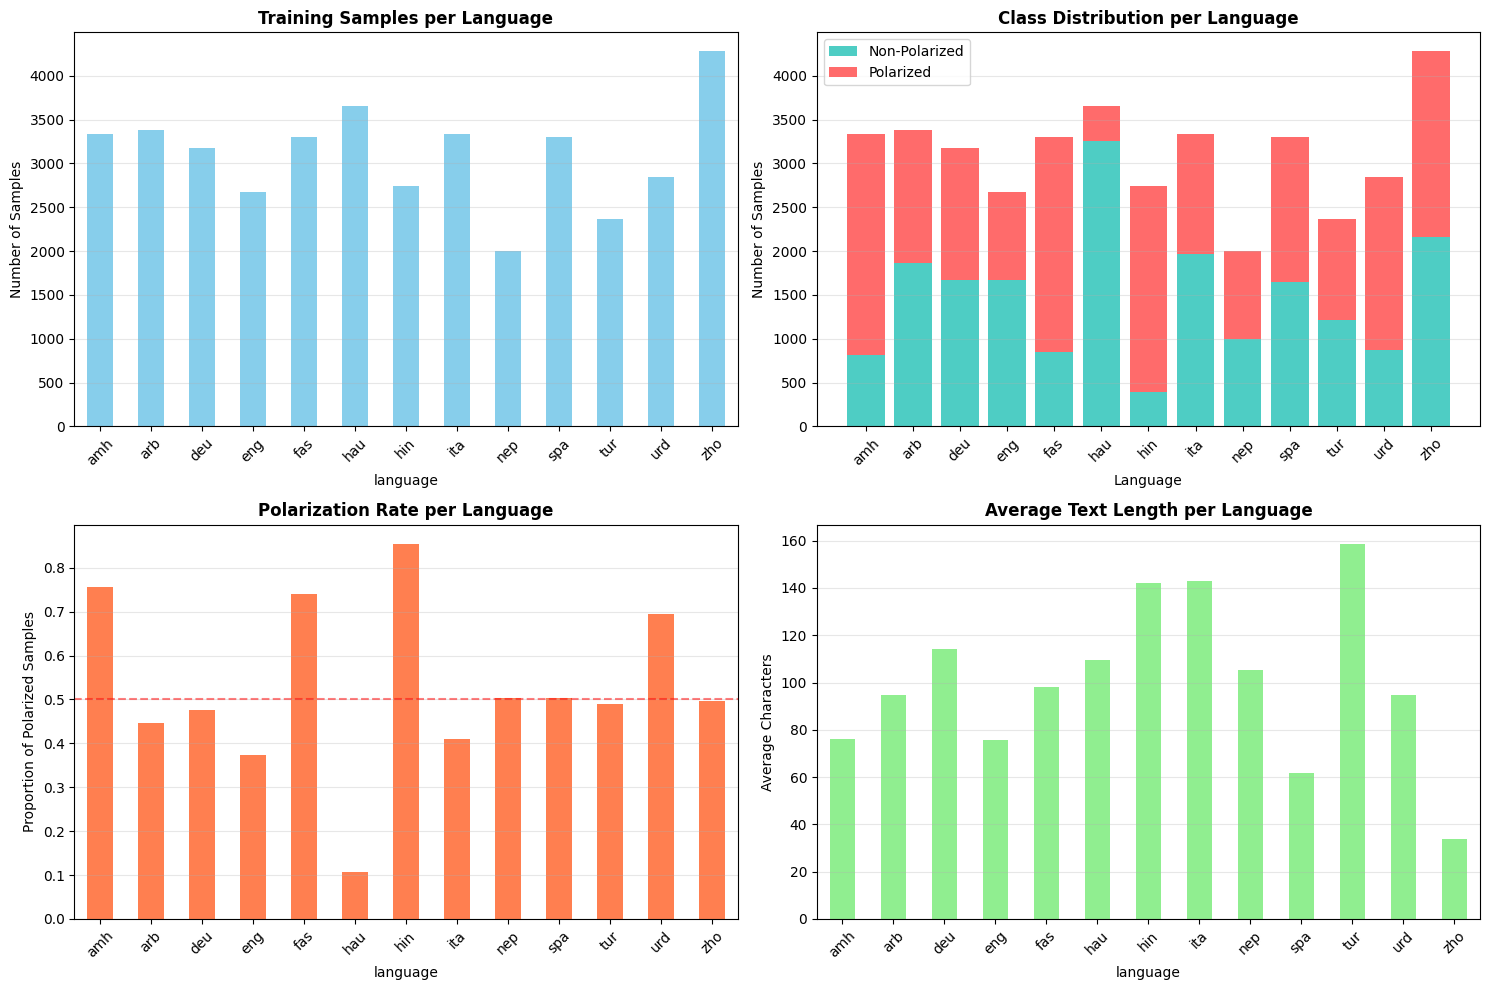

In [ ]:
# ========================================
# STEP 7: VISUALIZATIONS
# ========================================

%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

ax1 = axes[0, 0]
stats_df.plot(
    x='language', y='train_samples', kind='bar', ax=ax1,
    color='skyblue', legend=False
)
ax1.set_title('Training Samples per Language', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Samples')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[0, 1]
x_pos = range(len(stats_df))
ax2.bar(x_pos, stats_df['train_non_polarized'], label='Non-Polarized', color='#4ecdc4')
ax2.bar(
    x_pos, stats_df['train_polarized'],
    bottom=stats_df['train_non_polarized'],
    label='Polarized', color='#ff6b6b'
)
ax2.set_title('Class Distribution per Language', fontsize=12, fontweight='bold')
ax2.set_xlabel('Language')
ax2.set_ylabel('Number of Samples')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats_df['language'], rotation=45)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

ax3 = axes[1, 0]
stats_df.plot(
    x='language', y='polarization_rate', kind='bar',
    ax=ax3, color='coral', legend=False
)
ax3.set_title('Polarization Rate per Language', fontsize=12, fontweight='bold')
ax3.set_ylabel('Proportion of Polarized Samples')
ax3.tick_params(axis='x', rotation=45)
ax3.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
stats_df.plot(
    x='language', y='avg_text_length', kind='bar',
    ax=ax4, color='lightgreen', legend=False
)
ax4.set_title('Average Text Length per Language', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Characters')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

fig.tight_layout()
plt.show()


In [ ]:
# ========================================
# STEP 8: SAMPLE DATA FROM DIFFERENT LANGUAGES
# ========================================

import pandas as pd

languages_to_check = ['eng', 'deu', 'arb', 'hin']

for lang in languages_to_check:
    print("="*70)
    print(f"{lang.upper()} - SAMPLE DATA")
    print("="*70)

    df = pd.read_csv(f'subtask1/train/{lang}.csv')
    print(f"Columns: {df.columns.tolist()}")
    print(f"\nFirst 2 examples:")
    for idx, row in df.head(2).iterrows():
        print(f"\nExample {idx+1}:")
        print(f"  Text: {row['text'][:100]}...")
        print(f"  Label: {row['polarization']} ({'Polarized' if row['polarization']==1 else 'Non-polarized'})")
    print()

ENG - SAMPLE DATA
Columns: ['id', 'text', 'polarization']

First 2 examples:

Example 1:
  Text:  is defending imperialism in the dnd chat...
  Label: 0 (Non-polarized)

Example 2:
  Text: Still playing with this. I am now following Rachel Maddie from msnbc....
  Label: 0 (Non-polarized)

DEU - SAMPLE DATA
Columns: ['id', 'text', 'polarization']

First 2 examples:

Example 1:
  Text: Natürlich bin ich linksgrün - ich habe Herz u n d ...
  Label: 0 (Non-polarized)

Example 2:
  Text: Schuld sind Habeck,  die grünen und diese linksgrün versifften Wokemenschen.

Die Spahnplatte ist so...
  Label: 1 (Polarized)

ARB - SAMPLE DATA
Columns: ['id', 'text', 'polarization']

First 2 examples:

Example 1:
  Text: احلام انتي ونعالي ومنو انتي حتى تقيمين الفنانين الملكه احلام هههههههه البقره احلام بابا عوفي الفن لا...
  Label: 1 (Polarized)

Example 2:
  Text: وره الكواليس تنيجج من وره بعير صطناعي على فكرة احﻻم رجل مو مره لهن تخيل على البنات الحلويات هههههههه...
  Label: 1 (Polarized)

HIN - SAMPLE

In [ ]:
# ========================================
# STEP 9: COMPLETE STATISTICS FOR 13 LANGUAGES
# ========================================

import pandas as pd

stats = []

for file in sorted(os.listdir('subtask1/train/')):
    if file.endswith('.csv'):
        lang_code = file.replace('.csv', '')

        # Load data
        train_df = pd.read_csv(f'subtask1/train/{file}')
        dev_df = pd.read_csv(f'subtask1/dev/{file}')

        # Calculate statistics
        stats.append({
            'Language': lang_code,
            'Train_Samples': len(train_df),
            'Dev_Samples': len(dev_df),
            'Total_Samples': len(train_df) + len(dev_df),
            'Train_Polarized': (train_df['polarization'] == 1).sum(),
            'Train_NonPolarized': (train_df['polarization'] == 0).sum(),
            'Polarization_Rate': f"{(train_df['polarization'] == 1).mean():.2%}",
            'Avg_Text_Length': f"{train_df['text'].str.len().mean():.0f}"
        })

# Create DataFrame and sort by train samples
stats_df = pd.DataFrame(stats)
stats_df_sorted = stats_df.sort_values('Train_Samples', ascending=False)

print("="*90)
print("COMPLETE STATISTICS - SORTED BY TRAINING SAMPLES")
print("="*90)
print(stats_df_sorted.to_string(index=False))

# Summary statistics
total_train = stats_df['Train_Samples'].sum()
total_dev = stats_df['Dev_Samples'].sum()

print("\n" + "="*90)
print("SUMMARY")
print("="*90)
print(f"Total languages: {len(stats_df)}")
print(f"Total training samples: {total_train:,}")
print(f"Total dev samples: {total_dev:,}")
print(f"Total samples: {total_train + total_dev:,}")
print(f"Average samples per language: {total_train / len(stats_df):.0f}")

COMPLETE STATISTICS - SORTED BY TRAINING SAMPLES
Language  Train_Samples  Dev_Samples  Total_Samples  Train_Polarized  Train_NonPolarized Polarization_Rate Avg_Text_Length
     zho           4280          214           4494             2121                2159            49.56%              34
     hau           3651          182           3833              392                3259            10.74%             110
     arb           3380          169           3549             1512                1868            44.73%              95
     ita           3334          166           3500             1368                1966            41.03%             143
     amh           3332          166           3498             2518                 814            75.57%              76
     spa           3305          165           3470             1660                1645            50.23%              62
     fas           3295          164           3459             2440                 855  

In [ ]:
# ========================================
# STEP 10: LANGUAGE GROUPING
# ========================================

# Convert to numeric for grouping
stats_df['Train_Samples_Numeric'] = pd.to_numeric(stats_df['Train_Samples'])

# Define thresholds based on your data
high_threshold = stats_df['Train_Samples_Numeric'].quantile(0.67)  # Top 33%
low_threshold = stats_df['Train_Samples_Numeric'].quantile(0.33)   # Bottom 33%

high_resource = stats_df[stats_df['Train_Samples_Numeric'] >= high_threshold]['Language'].tolist()
medium_resource = stats_df[(stats_df['Train_Samples_Numeric'] >= low_threshold) &
                           (stats_df['Train_Samples_Numeric'] < high_threshold)]['Language'].tolist()
low_resource = stats_df[stats_df['Train_Samples_Numeric'] < low_threshold]['Language'].tolist()

print("="*70)
print("LANGUAGE GROUPING BY RESOURCE LEVEL")
print("="*70)

print(f"\nHigh-resource ({len(high_resource)} languages):")
for lang in high_resource:
    samples = stats_df[stats_df['Language']==lang]['Train_Samples'].values[0]
    print(f"  {lang}: {samples} samples")

print(f"\nMedium-resource ({len(medium_resource)} languages):")
for lang in medium_resource:
    samples = stats_df[stats_df['Language']==lang]['Train_Samples'].values[0]
    print(f"  {lang}: {samples} samples")

print(f"\nLow-resource ({len(low_resource)} languages):")
for lang in low_resource:
    samples = stats_df[stats_df['Language']==lang]['Train_Samples'].values[0]
    print(f"  {lang}: {samples} samples")

LANGUAGE GROUPING BY RESOURCE LEVEL

High-resource (4 languages):
  arb: 3380 samples
  hau: 3651 samples
  ita: 3334 samples
  zho: 4280 samples

Medium-resource (5 languages):
  amh: 3332 samples
  deu: 3180 samples
  fas: 3295 samples
  spa: 3305 samples
  urd: 2849 samples

Low-resource (4 languages):
  eng: 2676 samples
  hin: 2744 samples
  nep: 2005 samples
  tur: 2364 samples


In [ ]:
# ========================================
# STEP 11: CLASS BALANCE ANALYSIS
# ========================================

print("="*70)
print("CLASS BALANCE PER LANGUAGE")
print("="*70)

for file in sorted(os.listdir('subtask1/train/')):
    if file.endswith('.csv'):
        lang = file.replace('.csv', '')
        df = pd.read_csv(f'subtask1/train/{file}')

        total = len(df)
        polarized = (df['polarization'] == 1).sum()
        non_polarized = (df['polarization'] == 0).sum()
        balance = polarized / total

        status = 'BALANCED'
        if balance < 0.3:
            status = 'HEAVILY NON-POLARIZED'
        elif balance > 0.7:
            status = 'HEAVILY POLARIZED'
        elif balance < 0.4 or balance > 0.6:
            status = 'SLIGHTLY IMBALANCED'

        print(f"{lang}: {polarized:>5} polarized ({balance:>5.1%}), " +
              f"{non_polarized:>5} non-polarized ({1-balance:>5.1%}) - {status}")

CLASS BALANCE PER LANGUAGE
amh:  2518 polarized (75.6%),   814 non-polarized (24.4%) - HEAVILY POLARIZED
arb:  1512 polarized (44.7%),  1868 non-polarized (55.3%) - BALANCED
deu:  1512 polarized (47.5%),  1668 non-polarized (52.5%) - BALANCED
eng:  1002 polarized (37.4%),  1674 non-polarized (62.6%) - SLIGHTLY IMBALANCED
fas:  2440 polarized (74.1%),   855 non-polarized (25.9%) - HEAVILY POLARIZED
hau:   392 polarized (10.7%),  3259 non-polarized (89.3%) - HEAVILY NON-POLARIZED
hin:  2346 polarized (85.5%),   398 non-polarized (14.5%) - HEAVILY POLARIZED
ita:  1368 polarized (41.0%),  1966 non-polarized (59.0%) - BALANCED
nep:  1008 polarized (50.3%),   997 non-polarized (49.7%) - BALANCED
spa:  1660 polarized (50.2%),  1645 non-polarized (49.8%) - BALANCED
tur:  1155 polarized (48.9%),  1209 non-polarized (51.1%) - BALANCED
urd:  1976 polarized (69.4%),   873 non-polarized (30.6%) - SLIGHTLY IMBALANCED
zho:  2121 polarized (49.6%),  2159 non-polarized (50.4%) - BALANCED


In [ ]:
# ========================================
# STEP 12: CHECK RAW DATA QUALITY
# ========================================

import pandas as pd

def inspect_data(lang='tur'):
    """
    Inspect data quality for a language
    """
    print("="*70)
    print(f"DATA INSPECTION: {lang.upper()}")
    print("="*70)

    # Load train
    train_df = pd.read_csv(f'subtask1/train/{lang}.csv')
    print(f"\nTRAIN DATA:")
    print(f"  Total rows: {len(train_df)}")
    print(f"  Columns: {train_df.columns.tolist()}")

    # Check for missing values
    print(f"\n  Missing values:")
    print(train_df.isnull().sum())

    # Check polarization column
    print(f"\n  Polarization distribution:")
    print(train_df['polarization'].value_counts())
    print(f"  Unique values: {train_df['polarization'].unique()}")

    # Check text column
    print(f"\n  Text stats:")
    print(f"    Empty strings: {(train_df['text'].str.strip() == '').sum()}")
    print(f"    Text length (mean): {train_df['text'].str.len().mean():.0f}")
    print(f"    Text length (min): {train_df['text'].str.len().min()}")
    print(f"    Text length (max): {train_df['text'].str.len().max()}")

    # Sample texts
    print(f"\n  Sample texts:")
    for i in range(min(3, len(train_df))):
        text = train_df.iloc[i]['text'][:80]
        label = train_df.iloc[i]['polarization']
        print(f"    [{label}] {text}...")

    # Load dev
    print(f"\n{'='*70}")
    dev_df = pd.read_csv(f'subtask1/dev/{lang}.csv')
    print(f"DEV DATA:")
    print(f"  Total rows: {len(dev_df)}")

    # Check for missing values
    print(f"\n  Missing values:")
    print(dev_df.isnull().sum())

    # Check polarization column
    print(f"\n  Polarization distribution:")
    print(dev_df['polarization'].value_counts(dropna=False))
    print(f"  Unique values (including NaN): {dev_df['polarization'].unique()}")

    # Check if there are NaN values
    nan_count = dev_df['polarization'].isna().sum()
    if nan_count > 0:
        print(f"\n  WARNING: {nan_count} NaN values in polarization column!")
        print(f"  Rows with NaN:")
        print(dev_df[dev_df['polarization'].isna()][['id', 'text', 'polarization']].head())

# Inspect Turkish data
inspect_data('tur')

# Also check English
print("\n" + "="*70)
inspect_data('eng')

DATA INSPECTION: TUR

TRAIN DATA:
  Total rows: 2364
  Columns: ['id', 'text', 'polarization']

  Missing values:
id              0
text            0
polarization    0
dtype: int64

  Polarization distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64
  Unique values: [0 1]

  Text stats:
    Empty strings: 0
    Text length (mean): 159
    Text length (min): 23
    Text length (max): 292

  Sample texts:
    [0] Çıldırmam an meselesi Ben eskiden dövme yaptırmıştim ölünce hoca dövme olan yeri...
    [1] 2 Yurtlarını işgal ettiği mazlum v e masum Filistinlilere Devlet Terörü uygulama...
    [0] @USER Bereket Versin. İHA’ dan ateş edildiğinde hedefe varmayan Roket 🚀 utansın....

DEV DATA:
  Total rows: 115

  Missing values:
id                0
text              0
polarization    115
dtype: int64

  Polarization distribution:
polarization
NaN    115
Name: count, dtype: int64
  Unique values (including NaN): [nan]

  Rows with NaN:
                                     id

In [ ]:
# ========================================
# STEP 13: PREPROCESSING FUNCTIONS
# ========================================

import re
import string

def preprocess_for_tfidf(text):
    """
    Aggressive preprocessing for TF-IDF baseline
    - Remove URLs, mentions, hashtags
    - Remove emojis
    - Lowercase
    - Remove extra punctuation
    """
    # Convert to string
    text = str(text)

    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtag symbol but keep the text
    text = re.sub(r'#', '', text)

    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove extra punctuation (keep only basic ones)
    text = re.sub(r'[^\w\s.!?,]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove very short texts (optional)
    if len(text) < 3:
        return ""

    return text


def preprocess_for_transformer(text):
    """
    Light preprocessing for XLM-RoBERTa
    - Remove URLs, mentions
    - Keep emojis (transformers can learn from them)
    - Keep original case (important for transformers)
    - Keep punctuation (carries sentiment)
    """
    # Convert to string
    text = str(text)

    # Do NOT lowercase - transformers handle case

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtag symbol but keep text
    text = re.sub(r'#', '', text)

    # Keep emojis - they're informative for sentiment!
    # Keep punctuation - "!!!" means intensity
    # Keep case - "HATE" vs "hate"

    # Only remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# ========================================
# TEST PREPROCESSING
# ========================================

# Test samples
test_samples = [
    "@USER Bu hükümet HAİN! 🚀 Roket #politik https://example.com 😊",
    "I HATE this government!!! They are destroying everything 😡",
    "مرحبا 👋 هذا اختبار #سياسة @user",
]

print("="*70)
print("PREPROCESSING COMPARISON")
print("="*70)

for i, sample in enumerate(test_samples, 1):
    print(f"\nSample {i}:")
    print(f"Original:           {sample}")
    print(f"For TF-IDF:         {preprocess_for_tfidf(sample)}")
    print(f"For Transformer:    {preprocess_for_transformer(sample)}")
    print("-"*70)

PREPROCESSING COMPARISON

Sample 1:
Original:           @USER Bu hükümet HAİN! 🚀 Roket #politik https://example.com 😊
For TF-IDF:         bu hükümet hain! roket politik
For Transformer:    Bu hükümet HAİN! 🚀 Roket politik 😊
----------------------------------------------------------------------

Sample 2:
Original:           I HATE this government!!! They are destroying everything 😡
For TF-IDF:         i hate this government!!! they are destroying everything
For Transformer:    I HATE this government!!! They are destroying everything 😡
----------------------------------------------------------------------

Sample 3:
Original:           مرحبا 👋 هذا اختبار #سياسة @user
For TF-IDF:         مرحبا هذا اختبار سياسة
For Transformer:    مرحبا 👋 هذا اختبار سياسة
----------------------------------------------------------------------


Training TF-IDF baseline for Turkish...

TF-IDF BASELINE: TUR

Original samples: 2364
Polarization distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2364

Split:
  Train: 2009 samples
  Val:   355 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6423
F1 Non-Polarized: 0.6423
F1 Polarized:     0.6423

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6590    0.6264    0.6423       182
    Polarized     0.6264    0.6590    0.6423       173

     accuracy                         0.6423       355
    macro avg     0.6427    0.6427    0.6423       355
 weighted avg     0.6431    0.6423    0.6423       355



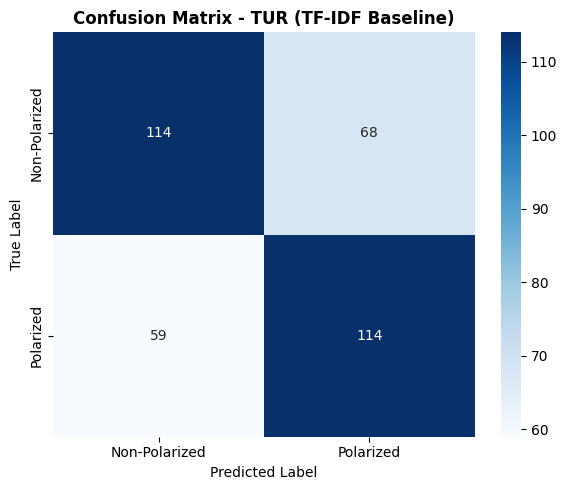

In [ ]:
# ========================================
# STEP 14: TF-IDF BASELINE MODEL
# ========================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_tfidf_baseline(lang='tur'):
    """
    Train TF-IDF baseline for one language
    """
    print("="*70)
    print(f"TF-IDF BASELINE: {lang.upper()}")
    print("="*70)

    # Load data
    train_df = pd.read_csv(f'subtask1/train/{lang}.csv')

    print(f"\nOriginal samples: {len(train_df)}")
    print(f"Polarization distribution:")
    print(train_df['polarization'].value_counts())

    # Preprocess text
    print(f"\nPreprocessing...")
    train_df['text_clean'] = train_df['text'].apply(preprocess_for_tfidf)

    # Remove empty texts after preprocessing
    train_df = train_df[train_df['text_clean'].str.len() > 0]
    print(f"Samples after cleaning: {len(train_df)}")

    # Split into train and validation
    train_data, val_data = train_test_split(
        train_df,
        test_size=0.15,
        random_state=42,
        stratify=train_df['polarization']
    )

    print(f"\nSplit:")
    print(f"  Train: {len(train_data)} samples")
    print(f"  Val:   {len(val_data)} samples")

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    )

    X_train = vectorizer.fit_transform(train_data['text_clean'])
    X_val = vectorizer.transform(val_data['text_clean'])

    print(f"\nTF-IDF features: {X_train.shape[1]}")

    # Train model
    print(f"\nTraining Logistic Regression...")
    model = LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, train_data['polarization'])

    # Predict
    y_pred = model.predict(X_val)
    y_true = val_data['polarization']

    # Calculate metrics
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_per_class = f1_score(y_true, y_pred, average=None)

    # Print results
    print(f"\n{'='*70}")
    print(f"RESULTS")
    print(f"{'='*70}")
    print(f"F1 Macro:         {f1_macro:.4f}")
    print(f"F1 Non-Polarized: {f1_per_class[0]:.4f}")
    print(f"F1 Polarized:     {f1_per_class[1]:.4f}")

    print(f"\nDetailed Classification Report:")
    print(classification_report(
        y_true, y_pred,
        target_names=['Non-Polarized', 'Polarized'],
        digits=4
    ))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Polarized', 'Polarized'],
                yticklabels=['Non-Polarized', 'Polarized'])
    plt.title(f'Confusion Matrix - {lang.upper()} (TF-IDF Baseline)',
              fontsize=12, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return f1_macro, model, vectorizer


# Train baseline for Turkish
print("Training TF-IDF baseline for Turkish...\n")
f1_tur, model_tur, vec_tur = train_tfidf_baseline('tur')

Starting TF-IDF baseline training for ALL 13 languages...

Found 13 languages: amh, arb, deu, eng, fas, hau, hin, ita, nep, spa, tur, urd, zho

[1/13] Processing AMH...
----------------------------------------------------------------------
TF-IDF BASELINE: AMH

Original samples: 3332
Polarization distribution:
polarization
1    2518
0     814
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3332

Split:
  Train: 2832 samples
  Val:   500 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6465
F1 Non-Polarized: 0.4747
F1 Polarized:     0.8183

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.4519    0.5000    0.4747       122
    Polarized     0.8329    0.8042    0.8183       378

     accuracy                         0.7300       500
    macro avg     0.6424    0.6521    0.6465       500
 weighted avg     0.7399    0.7300    0.7345       500



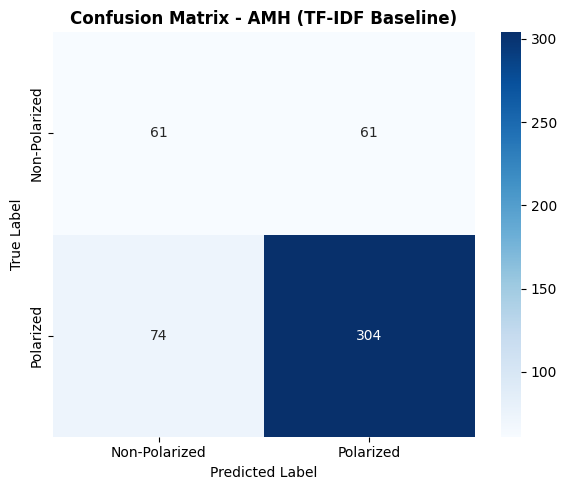

✓ amh: F1 = 0.6465

[2/13] Processing ARB...
----------------------------------------------------------------------
TF-IDF BASELINE: ARB

Original samples: 3380
Polarization distribution:
polarization
0    1868
1    1512
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3380

Split:
  Train: 2873 samples
  Val:   507 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7178
F1 Non-Polarized: 0.7234
F1 Polarized:     0.7123

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7890    0.6679    0.7234       280
    Polarized     0.6556    0.7797    0.7123       227

     accuracy                         0.7179       507
    macro avg     0.7223    0.7238    0.7178       507
 weighted avg     0.7293    0.7179    0.7184       507



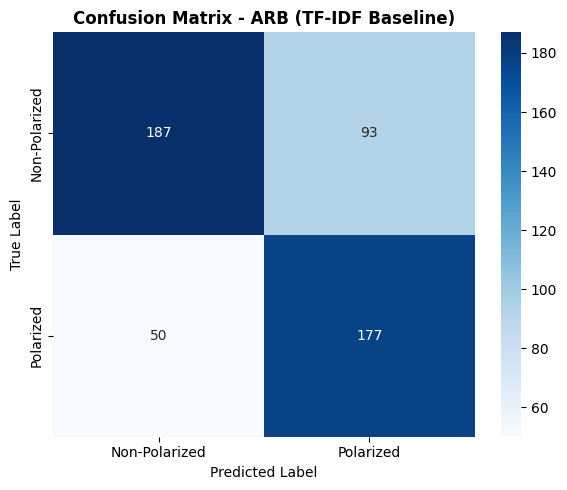

✓ arb: F1 = 0.7178

[3/13] Processing DEU...
----------------------------------------------------------------------
TF-IDF BASELINE: DEU

Original samples: 3180
Polarization distribution:
polarization
0    1668
1    1512
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3180

Split:
  Train: 2703 samples
  Val:   477 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6404
F1 Non-Polarized: 0.6600
F1 Polarized:     0.6208

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6561    0.6640    0.6600       250
    Polarized     0.6250    0.6167    0.6208       227

     accuracy                         0.6415       477
    macro avg     0.6406    0.6404    0.6404       477
 weighted avg     0.6413    0.6415    0.6414       477



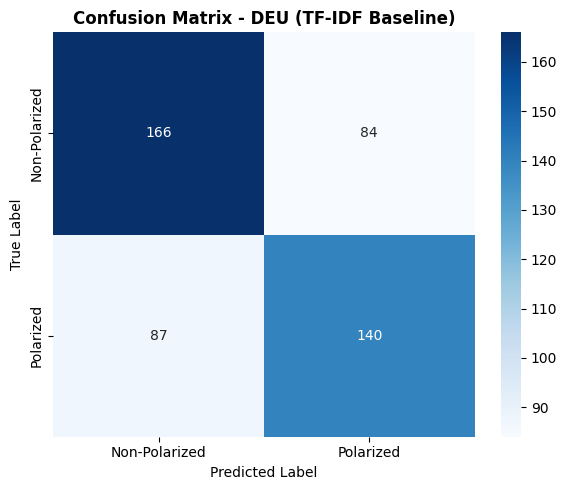

✓ deu: F1 = 0.6404

[4/13] Processing ENG...
----------------------------------------------------------------------
TF-IDF BASELINE: ENG

Original samples: 2676
Polarization distribution:
polarization
0    1674
1    1002
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2676

Split:
  Train: 2274 samples
  Val:   402 samples

TF-IDF features: 4363

Training Logistic Regression...

RESULTS
F1 Macro:         0.7226
F1 Non-Polarized: 0.7785
F1 Polarized:     0.6667

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.8103    0.7490    0.7785       251
    Polarized     0.6294    0.7086    0.6667       151

     accuracy                         0.7338       402
    macro avg     0.7199    0.7288    0.7226       402
 weighted avg     0.7424    0.7338    0.7365       402



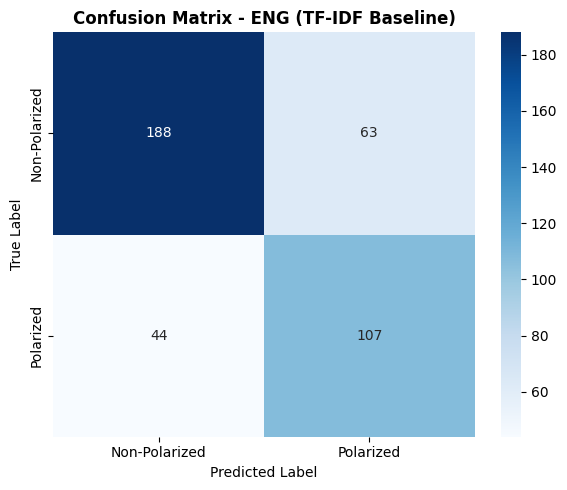

✓ eng: F1 = 0.7226

[5/13] Processing FAS...
----------------------------------------------------------------------
TF-IDF BASELINE: FAS

Original samples: 3295
Polarization distribution:
polarization
1    2440
0     855
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3295

Split:
  Train: 2800 samples
  Val:   495 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7581
F1 Non-Polarized: 0.6549
F1 Polarized:     0.8612

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.5962    0.7266    0.6549       128
    Polarized     0.8968    0.8283    0.8612       367

     accuracy                         0.8020       495
    macro avg     0.7465    0.7775    0.7581       495
 weighted avg     0.8190    0.8020    0.8079       495



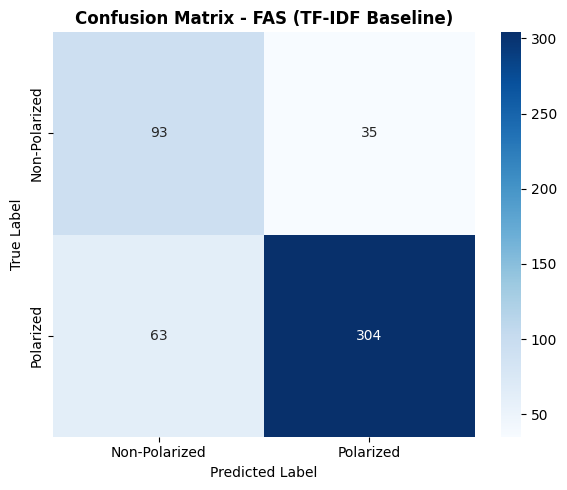

✓ fas: F1 = 0.7581

[6/13] Processing HAU...
----------------------------------------------------------------------
TF-IDF BASELINE: HAU

Original samples: 3651
Polarization distribution:
polarization
0    3259
1     392
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3650

Split:
  Train: 3102 samples
  Val:   548 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6792
F1 Non-Polarized: 0.9110
F1 Polarized:     0.4474

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.9451    0.8793    0.9110       489
    Polarized     0.3656    0.5763    0.4474        59

     accuracy                         0.8467       548
    macro avg     0.6553    0.7278    0.6792       548
 weighted avg     0.8827    0.8467    0.8611       548



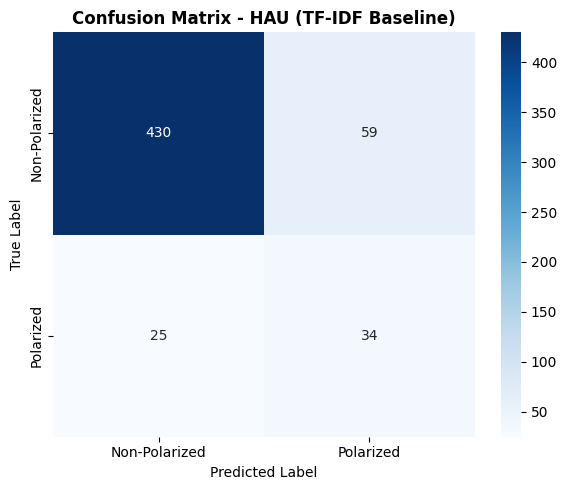

✓ hau: F1 = 0.6792

[7/13] Processing HIN...
----------------------------------------------------------------------
TF-IDF BASELINE: HIN

Original samples: 2744
Polarization distribution:
polarization
1    2346
0     398
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2744

Split:
  Train: 2332 samples
  Val:   412 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.7023
F1 Non-Polarized: 0.5000
F1 Polarized:     0.9046

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.4583    0.5500    0.5000        60
    Polarized     0.9206    0.8892    0.9046       352

     accuracy                         0.8398       412
    macro avg     0.6895    0.7196    0.7023       412
 weighted avg     0.8533    0.8398    0.8457       412



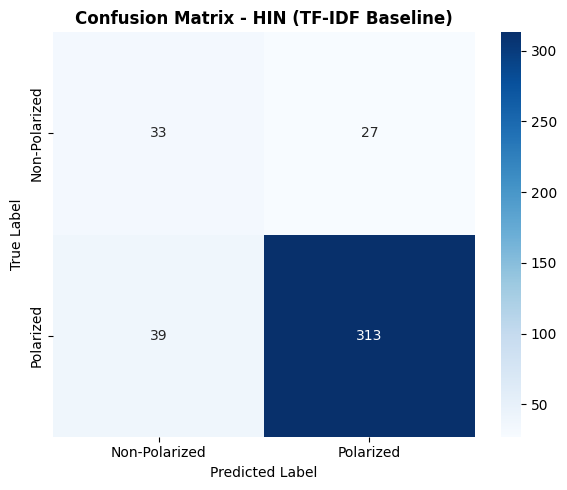

✓ hin: F1 = 0.7023

[8/13] Processing ITA...
----------------------------------------------------------------------
TF-IDF BASELINE: ITA

Original samples: 3334
Polarization distribution:
polarization
0    1966
1    1368
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3334

Split:
  Train: 2833 samples
  Val:   501 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6106
F1 Non-Polarized: 0.6735
F1 Polarized:     0.5476

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6829    0.6644    0.6735       295
    Polarized     0.5374    0.5583    0.5476       206

     accuracy                         0.6208       501
    macro avg     0.6102    0.6113    0.6106       501
 weighted avg     0.6231    0.6208    0.6218       501



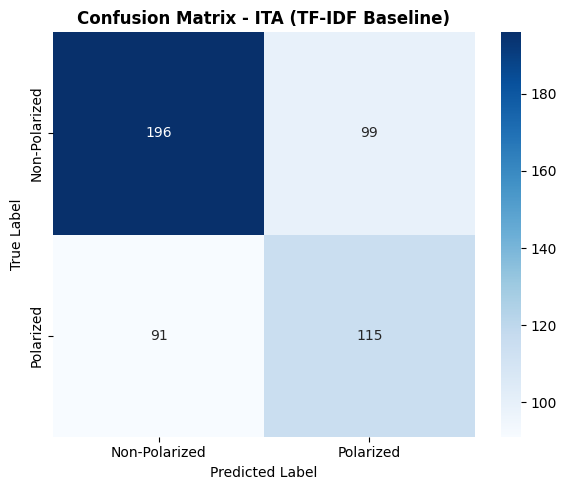

✓ ita: F1 = 0.6106

[9/13] Processing NEP...
----------------------------------------------------------------------
TF-IDF BASELINE: NEP

Original samples: 2005
Polarization distribution:
polarization
1    1008
0     997
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2005

Split:
  Train: 1704 samples
  Val:   301 samples

TF-IDF features: 4221

Training Logistic Regression...

RESULTS
F1 Macro:         0.8138
F1 Non-Polarized: 0.8194
F1 Polarized:     0.8082

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.7937    0.8467    0.8194       150
    Polarized     0.8369    0.7815    0.8082       151

     accuracy                         0.8140       301
    macro avg     0.8153    0.8141    0.8138       301
 weighted avg     0.8154    0.8140    0.8138       301



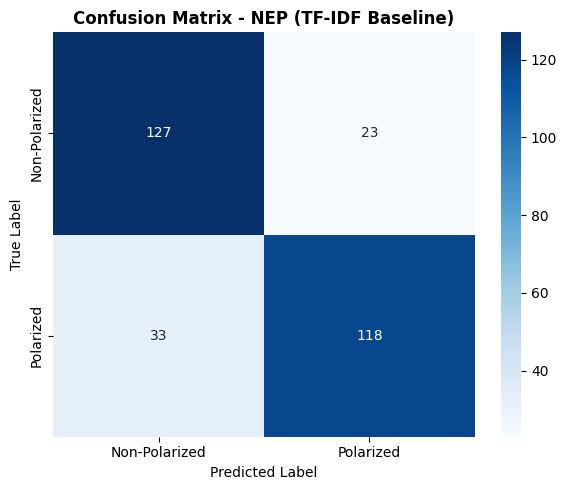

✓ nep: F1 = 0.8138

[10/13] Processing SPA...
----------------------------------------------------------------------
TF-IDF BASELINE: SPA

Original samples: 3305
Polarization distribution:
polarization
1    1660
0    1645
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 3305

Split:
  Train: 2809 samples
  Val:   496 samples

TF-IDF features: 4361

Training Logistic Regression...

RESULTS
F1 Macro:         0.6673
F1 Non-Polarized: 0.6653
F1 Polarized:     0.6693

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6667    0.6640    0.6653       247
    Polarized     0.6680    0.6707    0.6693       249

     accuracy                         0.6673       496
    macro avg     0.6673    0.6673    0.6673       496
 weighted avg     0.6673    0.6673    0.6673       496



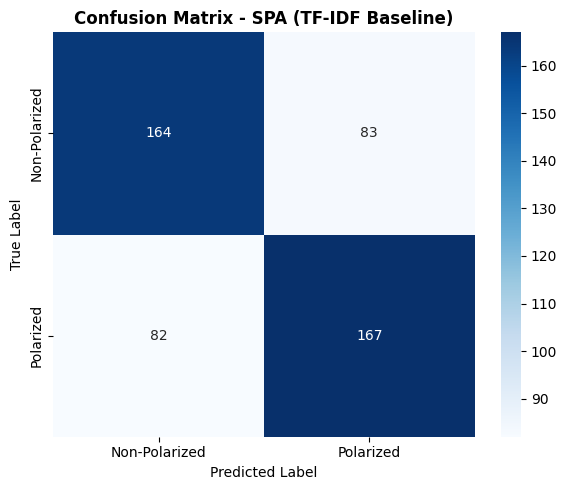

✓ spa: F1 = 0.6673

[11/13] Processing TUR...
----------------------------------------------------------------------
TF-IDF BASELINE: TUR

Original samples: 2364
Polarization distribution:
polarization
0    1209
1    1155
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2364

Split:
  Train: 2009 samples
  Val:   355 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6423
F1 Non-Polarized: 0.6423
F1 Polarized:     0.6423

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6590    0.6264    0.6423       182
    Polarized     0.6264    0.6590    0.6423       173

     accuracy                         0.6423       355
    macro avg     0.6427    0.6427    0.6423       355
 weighted avg     0.6431    0.6423    0.6423       355



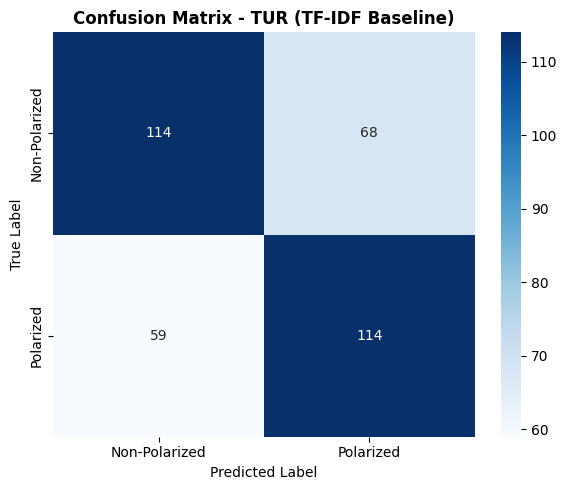

✓ tur: F1 = 0.6423

[12/13] Processing URD...
----------------------------------------------------------------------
TF-IDF BASELINE: URD

Original samples: 2849
Polarization distribution:
polarization
1    1976
0     873
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 2849

Split:
  Train: 2421 samples
  Val:   428 samples

TF-IDF features: 5000

Training Logistic Regression...

RESULTS
F1 Macro:         0.6824
F1 Non-Polarized: 0.5704
F1 Polarized:     0.7945

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.5411    0.6031    0.5704       131
    Polarized     0.8156    0.7744    0.7945       297

     accuracy                         0.7220       428
    macro avg     0.6783    0.6887    0.6824       428
 weighted avg     0.7316    0.7220    0.7259       428



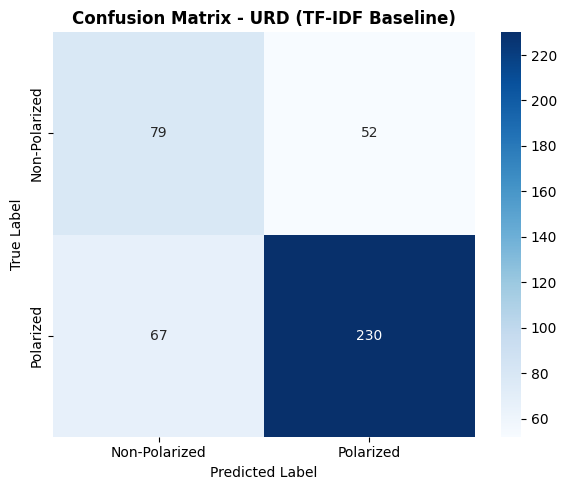

✓ urd: F1 = 0.6824

[13/13] Processing ZHO...
----------------------------------------------------------------------
TF-IDF BASELINE: ZHO

Original samples: 4280
Polarization distribution:
polarization
0    2159
1    2121
Name: count, dtype: int64

Preprocessing...
Samples after cleaning: 477

Split:
  Train: 405 samples
  Val:   72 samples

TF-IDF features: 34

Training Logistic Regression...

RESULTS
F1 Macro:         0.4526
F1 Non-Polarized: 0.7719
F1 Polarized:     0.1333

Detailed Classification Report:
               precision    recall  f1-score   support

Non-Polarized     0.6377    0.9778    0.7719        45
    Polarized     0.6667    0.0741    0.1333        27

     accuracy                         0.6389        72
    macro avg     0.6522    0.5259    0.4526        72
 weighted avg     0.6486    0.6389    0.5325        72



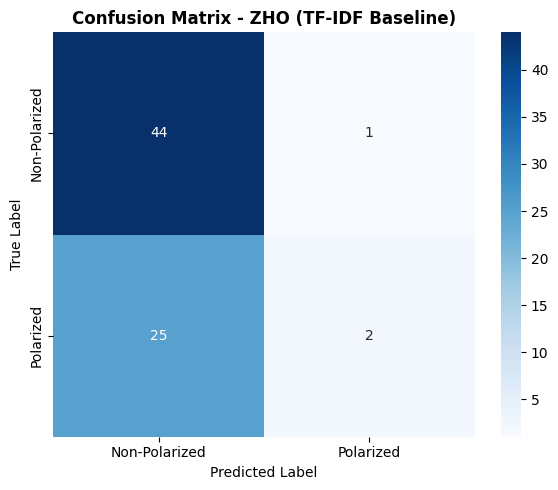

✓ zho: F1 = 0.4526

TF-IDF BASELINE RESULTS - ALL LANGUAGES
✓   nep: 0.8138
✓   fas: 0.7581
✓   eng: 0.7226
✓   arb: 0.7178
✓   hin: 0.7023
✓   urd: 0.6824
✓   hau: 0.6792
✓   spa: 0.6673
✓   amh: 0.6465
✓   tur: 0.6423
✓   deu: 0.6404
✓   ita: 0.6106
✓   zho: 0.4526

STATISTICS
Successful:     13/13
Average F1:     0.6720
Best:           nep (0.8138)
Worst:          zho (0.4526)
Std Dev:        0.0855


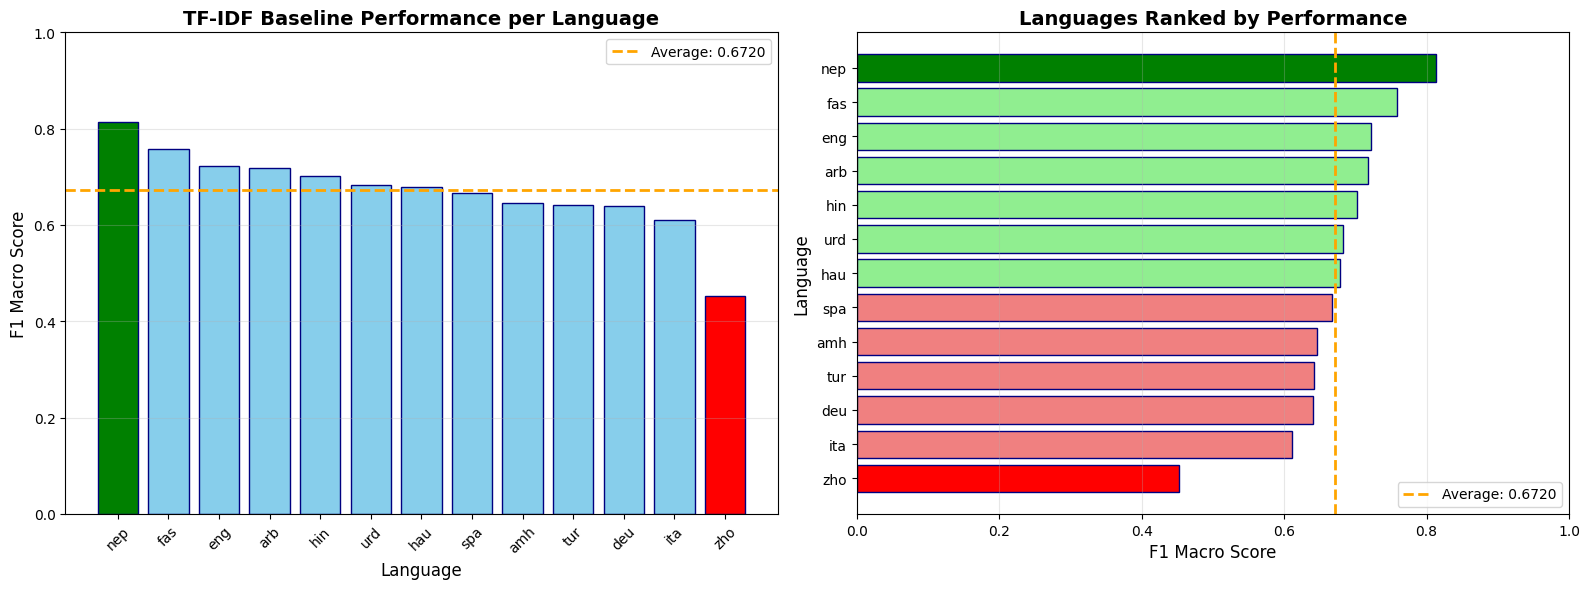

In [ ]:
# ========================================
# STEP 15: BASELINE FOR ALL 13 LANGUAGES
# ========================================

import os

def train_all_languages_baseline():
    """
    Train TF-IDF baseline for ALL languages in the dataset
    """
    # Get all language files
    train_path = 'subtask1/train/'
    all_languages = sorted([f.replace('.csv', '') for f in os.listdir(train_path) if f.endswith('.csv')])

    print(f"Found {len(all_languages)} languages: {', '.join(all_languages)}")
    print("="*70)

    results = []

    for i, lang in enumerate(all_languages, 1):
        print(f"\n[{i}/{len(all_languages)}] Processing {lang.upper()}...")
        print("-"*70)

        try:
            f1, model, vectorizer = train_tfidf_baseline(lang)

            results.append({
                'Language': lang,
                'F1_Macro': f1,
                'Status': 'Success'
            })

            print(f"✓ {lang}: F1 = {f1:.4f}")

        except Exception as e:
            print(f"✗ {lang}: Error - {e}")
            results.append({
                'Language': lang,
                'F1_Macro': 0.0,
                'Status': 'Failed'
            })

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('F1_Macro', ascending=False)

    # Print summary
    print("\n" + "="*70)
    print("TF-IDF BASELINE RESULTS - ALL LANGUAGES")
    print("="*70)

    for idx, row in results_df.iterrows():
        status_symbol = "✓" if row['Status'] == 'Success' else "✗"
        print(f"{status_symbol} {row['Language']:>5}: {row['F1_Macro']:.4f}")

    # Statistics
    successful = results_df[results_df['Status'] == 'Success']

    print("\n" + "="*70)
    print("STATISTICS")
    print("="*70)
    print(f"Successful:     {len(successful)}/{len(results_df)}")
    print(f"Average F1:     {successful['F1_Macro'].mean():.4f}")
    print(f"Best:           {successful.iloc[0]['Language']} ({successful.iloc[0]['F1_Macro']:.4f})")
    print(f"Worst:          {successful.iloc[-1]['Language']} ({successful.iloc[-1]['F1_Macro']:.4f})")
    print(f"Std Dev:        {successful['F1_Macro'].std():.4f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Bar chart
    ax1 = axes[0]
    colors = ['green' if x == successful['F1_Macro'].max() else
              'red' if x == successful['F1_Macro'].min() else
              'skyblue' for x in successful['F1_Macro']]

    ax1.bar(range(len(successful)), successful['F1_Macro'], color=colors, edgecolor='navy')
    ax1.axhline(y=successful['F1_Macro'].mean(), color='orange',
                linestyle='--', linewidth=2, label=f"Average: {successful['F1_Macro'].mean():.4f}")
    ax1.set_xticks(range(len(successful)))
    ax1.set_xticklabels(successful['Language'], rotation=45)
    ax1.set_xlabel('Language', fontsize=12)
    ax1.set_ylabel('F1 Macro Score', fontsize=12)
    ax1.set_title('TF-IDF Baseline Performance per Language', fontsize=14, fontweight='bold')
    ax1.set_ylim([0, 1])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)

    # Plot 2: Sorted bar chart
    ax2 = axes[1]
    sorted_results = successful.sort_values('F1_Macro', ascending=True)
    colors_sorted = ['green' if x == sorted_results['F1_Macro'].max() else
                     'red' if x == sorted_results['F1_Macro'].min() else
                     'lightcoral' if x < sorted_results['F1_Macro'].mean() else
                     'lightgreen' for x in sorted_results['F1_Macro']]

    ax2.barh(range(len(sorted_results)), sorted_results['F1_Macro'],
             color=colors_sorted, edgecolor='navy')
    ax2.axvline(x=sorted_results['F1_Macro'].mean(), color='orange',
                linestyle='--', linewidth=2, label=f"Average: {sorted_results['F1_Macro'].mean():.4f}")
    ax2.set_yticks(range(len(sorted_results)))
    ax2.set_yticklabels(sorted_results['Language'])
    ax2.set_xlabel('F1 Macro Score', fontsize=12)
    ax2.set_ylabel('Language', fontsize=12)
    ax2.set_title('Languages Ranked by Performance', fontsize=14, fontweight='bold')
    ax2.set_xlim([0, 1])
    ax2.legend()
    ax2.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return results_df

# Run baseline for ALL languages
print("Starting TF-IDF baseline training for ALL 13 languages...\n")
all_baseline_results = train_all_languages_baseline()

In [ ]:
# ========================================
# STEP 16: INSTALL AND SETUP TRANSFORMERS
# ========================================

# Install required packages
!pip install -q transformers datasets accelerate evaluate

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import Dataset

# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

if device == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("Warning: No GPU available. Training will be slow.")

print("\n✓ All packages installed!")

Device: cuda
GPU: Tesla T4
Memory: 15.83 GB

✓ All packages installed!


In [ ]:
# ========================================
# STEP 17: LOAD XLM-ROBERTA
# ========================================

model_name = "xlm-roberta-base"

print(f"Loading {model_name}...")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    problem_type="single_label_classification"
)

# Move to device
model = model.to(device)

# Model info
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nModel loaded!")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Loading xlm-roberta-base...


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded!
Total parameters: 278,045,186
Trainable parameters: 278,045,186


In [ ]:
# ========================================
# STEP 18: PREPARE DATA FOR XLM-ROBERTA
# ========================================

# All necessary imports
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Preprocessing function (in case it's not in memory)
def preprocess_for_transformer(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def prepare_xlmr_dataset(lang='tur', test_size=0.15, max_length=128):
    print(f"Preparing {lang.upper()} dataset...")

    train_df = pd.read_csv(f'subtask1/train/{lang}.csv')
    train_df['text_clean'] = train_df['text'].apply(preprocess_for_transformer)

    train_data, val_data = train_test_split(
        train_df, test_size=test_size, random_state=42,
        stratify=train_df['polarization']
    )

    print(f"  Train: {len(train_data)}, Val: {len(val_data)}")

    train_dataset = Dataset.from_pandas(train_data[['text_clean', 'polarization']])
    val_dataset = Dataset.from_pandas(val_data[['text_clean', 'polarization']])

    def tokenize_function(examples):
        return tokenizer(examples['text_clean'], padding='max_length',
                        truncation=True, max_length=max_length)

    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)

    train_dataset = train_dataset.rename_column('polarization', 'labels')
    val_dataset = val_dataset.rename_column('polarization', 'labels')

    train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
    val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    print("✓ Ready!")
    return train_dataset, val_dataset

# Run it
train_dataset, val_dataset = prepare_xlmr_dataset('tur')
print(f"\nTrain: {len(train_dataset)}, Val: {len(val_dataset)}")

Preparing TUR dataset...
  Train: 2009, Val: 355


Map:   0%|          | 0/2009 [00:00<?, ? examples/s]

Map:   0%|          | 0/355 [00:00<?, ? examples/s]

✓ Ready!

Train: 2009, Val: 355


In [ ]:
# ========================================
# STEP 19: TRAIN XLM-ROBERTA
# ========================================

from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Define compute metrics function
def compute_metrics(eval_pred):
    """
    Compute F1 score and accuracy
    """
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    f1_macro = f1_score(labels, predictions, average='macro')
    f1_per_class = f1_score(labels, predictions, average=None)
    accuracy = accuracy_score(labels, predictions)

    return {
        'f1_macro': f1_macro,
        'f1_non_polarized': f1_per_class[0],
        'f1_polarized': f1_per_class[1],
        'accuracy': accuracy
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results_xlmr_tur',
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model='f1_macro',
    save_total_limit=2,
    fp16=torch.cuda.is_available(),  # Use mixed precision if GPU available
    report_to='none'  # Disable wandb
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train
print("="*70)
print("TRAINING XLM-ROBERTA ON TURKISH")
print("="*70)
print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Epochs: {training_args.num_train_epochs}")
print(f"Batch size: {training_args.per_device_train_batch_size}")
print(f"Learning rate: {training_args.learning_rate}")
print("="*70)

# Start training
trainer.train()

# Evaluate
print("\n" + "="*70)
print("FINAL EVALUATION")
print("="*70)

eval_results = trainer.evaluate()

print(f"F1 Macro:         {eval_results['eval_f1_macro']:.4f}")
print(f"F1 Non-Polarized: {eval_results['eval_f1_non_polarized']:.4f}")
print(f"F1 Polarized:     {eval_results['eval_f1_polarized']:.4f}")
print(f"Accuracy:         {eval_results['eval_accuracy']:.4f}")

# Compare with TF-IDF baseline
print("\n" + "="*70)
print("COMPARISON")
print("="*70)
print(f"TF-IDF Baseline:  0.6423")
print(f"XLM-RoBERTa:      {eval_results['eval_f1_macro']:.4f}")
print(f"Improvement:      {eval_results['eval_f1_macro'] - 0.6423:+.4f}")

TRAINING XLM-ROBERTA ON TURKISH
Train samples: 2009
Val samples: 355
Epochs: 3
Batch size: 16
Learning rate: 2e-05


Epoch,Training Loss,Validation Loss,F1 Macro,F1 Non Polarized,F1 Polarized,Accuracy
1,0.615700,0.609202,0.665493,0.732394,0.598592,0.678873
2,0.521800,0.625875,0.711004,0.689024,0.732984,0.712676
3,0.446400,0.616032,0.718129,0.710983,0.725275,0.718310



FINAL EVALUATION


F1 Macro:         0.7181
F1 Non-Polarized: 0.7110
F1 Polarized:     0.7253
Accuracy:         0.7183

COMPARISON
TF-IDF Baseline:  0.6423
XLM-RoBERTa:      0.7181
Improvement:      +0.0758


In [ ]:
# ========================================
# STEP 20: PREPARE MULTILINGUAL DATASET (FIXED)
# ========================================

import pandas as pd
import os
from datasets import Dataset
from sklearn.model_selection import train_test_split

def prepare_multilingual_dataset(test_size=0.15, max_length=128):
    """
    Combine all 13 languages into one dataset
    """
    print("="*70)
    print("PREPARING MULTILINGUAL DATASET")
    print("="*70)

    # Get all language files
    train_path = 'subtask1/train/'
    all_languages = sorted([f.replace('.csv', '') for f in os.listdir(train_path) if f.endswith('.csv')])

    print(f"\nFound {len(all_languages)} languages: {', '.join(all_languages)}")

    all_train_data = []
    all_val_data = []

    stats = []

    for lang in all_languages:
        print(f"\nProcessing {lang}...")

        # Load data
        df = pd.read_csv(f'subtask1/train/{lang}.csv')

        # Preprocess
        df['text_clean'] = df['text'].apply(preprocess_for_transformer)

        # Add language identifier
        df['language'] = lang

        # Split
        lang_train_data, lang_val_data = train_test_split(
            df, test_size=test_size, random_state=42,
            stratify=df['polarization']
        )

        print(f"  {lang}: Train={len(lang_train_data)}, Val={len(lang_val_data)}")

        all_train_data.append(lang_train_data)
        all_val_data.append(lang_val_data)

        stats.append({
            'Language': lang,
            'Train': len(lang_train_data),
            'Val': len(lang_val_data)
        })

    # Concatenate all language dataframes
    combined_train_df = pd.concat(all_train_data, ignore_index=True)
    combined_val_df = pd.concat(all_val_data, ignore_index=True)

    # Shuffle
    combined_train_df = combined_train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    combined_val_df = combined_val_df.sample(frac=1, random_state=42).reset_index(drop=True)

    print("\n" + "="*70)
    print("COMBINED DATASET STATISTICS")
    print("="*70)
    print(f"Total train samples: {len(combined_train_df):,}")
    print(f"Total val samples: {len(combined_val_df):,}")

    # Show stats
    stats_df = pd.DataFrame(stats)
    print("\nSamples per language:")
    print(stats_df.to_string(index=False))

    # Convert to Hugging Face Dataset objects
    train_dataset = Dataset.from_pandas(combined_train_df[['text_clean', 'polarization', 'language']])
    val_dataset = Dataset.from_pandas(combined_val_df[['text_clean', 'polarization', 'language']])

    # Tokenization function
    def tokenize_function(examples):
        return tokenizer(examples['text_clean'], padding='max_length',
                        truncation=True, max_length=max_length)

    print("\nTokenizing...")
    train_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=['text_clean'])
    val_dataset = val_dataset.map(tokenize_function, batched=True, remove_columns=['text_clean'])

    # Rename 'polarization' column to 'labels'
    train_dataset = train_dataset.rename_column('polarization', 'labels')
    val_dataset = val_dataset.rename_column('polarization', 'labels')

    # Set format to PyTorch tensors
    train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
    val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

    print("\n✓ Multilingual dataset ready!")

    # Return 4 things: train_dataset, val_dataset, train_df, val_df
    return train_dataset, val_dataset, combined_train_df, combined_val_df

# Run it and save ALL 4 outputs
multilingual_train, multilingual_val, train_df, val_df = prepare_multilingual_dataset()

print(f"\n✓ Saved variables:")
print(f"  multilingual_train: {len(multilingual_train):,} samples")
print(f"  multilingual_val: {len(multilingual_val):,} samples")
print(f"  train_df: {len(train_df):,} rows")
print(f"  val_df: {len(val_df):,} rows")

PREPARING MULTILINGUAL DATASET

Found 13 languages: amh, arb, deu, eng, fas, hau, hin, ita, nep, spa, tur, urd, zho

Processing amh...
  amh: Train=2832, Val=500

Processing arb...
  arb: Train=2873, Val=507

Processing deu...
  deu: Train=2703, Val=477

Processing eng...
  eng: Train=2274, Val=402

Processing fas...
  fas: Train=2800, Val=495

Processing hau...
  hau: Train=3103, Val=548

Processing hin...
  hin: Train=2332, Val=412

Processing ita...
  ita: Train=2833, Val=501

Processing nep...
  nep: Train=1704, Val=301

Processing spa...
  spa: Train=2809, Val=496

Processing tur...
  tur: Train=2009, Val=355

Processing urd...
  urd: Train=2421, Val=428

Processing zho...
  zho: Train=3638, Val=642

COMBINED DATASET STATISTICS
Total train samples: 34,331
Total val samples: 6,064

Samples per language:
Language  Train  Val
     amh   2832  500
     arb   2873  507
     deu   2703  477
     eng   2274  402
     fas   2800  495
     hau   3103  548
     hin   2332  412
     ita   28

Map:   0%|          | 0/34331 [00:00<?, ? examples/s]

Map:   0%|          | 0/6064 [00:00<?, ? examples/s]


✓ Multilingual dataset ready!

✓ Saved variables:
  multilingual_train: 34,331 samples
  multilingual_val: 6,064 samples
  train_df: 34,331 rows
  val_df: 6,064 rows


In [ ]:
import os
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import torch
from datasets import concatenate_datasets # Import concatenate_datasets

# Load fresh model
model_name = "xlm-roberta-base"
multilingual_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2
).to(device)

print("\nPreparing multilingual datasets...")

all_train_datasets = []
all_val_datasets = []

train_path = 'subtask1/train/'
all_languages = sorted([f.replace('.csv', '') for f in os.listdir(train_path) if f.endswith('.csv')])

for lang in all_languages:
    train_ds, val_ds = prepare_xlmr_dataset(lang, test_size=0.15, max_length=128)
    all_train_datasets.append(train_ds)
    all_val_datasets.append(val_ds)

multilingual_train = concatenate_datasets(all_train_datasets)
multilingual_val = concatenate_datasets(all_val_datasets)

print(f"Combined multilingual train dataset size: {len(multilingual_train)}")
print(f"Combined multilingual validation dataset size: {len(multilingual_val)}")


# Training arguments with 10 epochs
training_args = TrainingArguments(
    output_dir='./results_xlmr_multilingual',

    # Evaluation
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='f1_macro',
    save_total_limit=1,  # Keep only best checkpoint

    # Training
    num_train_epochs=10,  # Allow up to 10 epochs
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    warmup_steps=500,  # Warmup for better stability with more epochs

    # Logging
    logging_steps=100,

    # Performance
    fp16=torch.cuda.is_available(),

    # Misc
    report_to='none'
)

# Trainer with early stopping
trainer = Trainer(
    model=multilingual_model,
    args=training_args,
    train_dataset=multilingual_train,
    eval_dataset=multilingual_val,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stop if no improvement for 3 epochs
)

print("="*70)
print("TRAINING MULTILINGUAL XLM-ROBERTA")
print("="*70)
print(f"Train samples: {len(multilingual_train):,} (all 13 languages)")
print(f"Val samples: {len(multilingual_val):,}")
print(f"Max epochs: {training_args.num_train_epochs}")
print(f"Early stopping patience: 3 epochs")
print(f"Learning rate: {training_args.learning_rate}")
print(f"Warmup steps: {training_args.warmup_steps}")
print(f"Will automatically save and load best model")
print("="*70)

# Train
print("\nStarting training...")
train_result = trainer.train()

# Show which epoch was best
print("\n" + "="*70)
print("TRAINING COMPLETED")
print("="*70)
print(f"Total epochs run: {int(train_result.metrics['epoch'])}")
print(f"Best model automatically loaded")

# Evaluate overall
eval_results_final = trainer.evaluate() # Renamed to avoid confusion with previous eval_results

print("\n" + "="*70)
print("MULTILINGUAL MODEL - OVERALL RESULTS")
print("="*70)
print(f"F1 Macro:         {eval_results_final['eval_f1_macro']:.4f}")
print(f"F1 Non-Polarized: {eval_results_final['eval_f1_non_polarized']:.4f}")
print(f"F1 Polarized:     {eval_results_final['eval_f1_polarized']:.4f}")
print(f"Accuracy:         {eval_results_final['eval_accuracy']:.4f}")


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Preparing multilingual datasets...
Preparing AMH dataset...
  Train: 2832, Val: 500


Map:   0%|          | 0/2832 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

✓ Ready!
Preparing ARB dataset...
  Train: 2873, Val: 507


Map:   0%|          | 0/2873 [00:00<?, ? examples/s]

Map:   0%|          | 0/507 [00:00<?, ? examples/s]

✓ Ready!
Preparing DEU dataset...
  Train: 2703, Val: 477


Map:   0%|          | 0/2703 [00:00<?, ? examples/s]

Map:   0%|          | 0/477 [00:00<?, ? examples/s]

✓ Ready!
Preparing ENG dataset...
  Train: 2274, Val: 402


Map:   0%|          | 0/2274 [00:00<?, ? examples/s]

Map:   0%|          | 0/402 [00:00<?, ? examples/s]

✓ Ready!
Preparing FAS dataset...
  Train: 2800, Val: 495


Map:   0%|          | 0/2800 [00:00<?, ? examples/s]

Map:   0%|          | 0/495 [00:00<?, ? examples/s]

✓ Ready!
Preparing HAU dataset...
  Train: 3103, Val: 548


Map:   0%|          | 0/3103 [00:00<?, ? examples/s]

Map:   0%|          | 0/548 [00:00<?, ? examples/s]

✓ Ready!
Preparing HIN dataset...
  Train: 2332, Val: 412


Map:   0%|          | 0/2332 [00:00<?, ? examples/s]

Map:   0%|          | 0/412 [00:00<?, ? examples/s]

✓ Ready!
Preparing ITA dataset...
  Train: 2833, Val: 501


Map:   0%|          | 0/2833 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

✓ Ready!
Preparing NEP dataset...
  Train: 1704, Val: 301


Map:   0%|          | 0/1704 [00:00<?, ? examples/s]

Map:   0%|          | 0/301 [00:00<?, ? examples/s]

✓ Ready!
Preparing SPA dataset...
  Train: 2809, Val: 496


Map:   0%|          | 0/2809 [00:00<?, ? examples/s]

Map:   0%|          | 0/496 [00:00<?, ? examples/s]

✓ Ready!
Preparing TUR dataset...
  Train: 2009, Val: 355


Map:   0%|          | 0/2009 [00:00<?, ? examples/s]

Map:   0%|          | 0/355 [00:00<?, ? examples/s]

✓ Ready!
Preparing URD dataset...
  Train: 2421, Val: 428


Map:   0%|          | 0/2421 [00:00<?, ? examples/s]

Map:   0%|          | 0/428 [00:00<?, ? examples/s]

✓ Ready!
Preparing ZHO dataset...
  Train: 3638, Val: 642


Map:   0%|          | 0/3638 [00:00<?, ? examples/s]

Map:   0%|          | 0/642 [00:00<?, ? examples/s]

✓ Ready!
Combined multilingual train dataset size: 34331
Combined multilingual validation dataset size: 6064
TRAINING MULTILINGUAL XLM-ROBERTA
Train samples: 34,331 (all 13 languages)
Val samples: 6,064
Max epochs: 10
Early stopping patience: 3 epochs
Learning rate: 2e-05
Warmup steps: 500
Will automatically save and load best model

Starting training...


Epoch,Training Loss,Validation Loss,F1 Macro,F1 Non Polarized,F1 Polarized,Accuracy
1,0.478100,0.472780,0.777067,0.758024,0.796111,0.778694
2,0.446700,0.482083,0.783462,0.781712,0.785212,0.783476
3,0.371900,0.499576,0.792876,0.792602,0.793149,0.792876
4,0.276000,0.587586,0.792494,0.789209,0.795779,0.792546
5,0.205600,0.852957,0.787763,0.788078,0.787448,0.787764


Epoch,Training Loss,Validation Loss,F1 Macro,F1 Non Polarized,F1 Polarized,Accuracy
1,0.478100,0.472780,0.777067,0.758024,0.796111,0.778694
2,0.446700,0.482083,0.783462,0.781712,0.785212,0.783476
3,0.371900,0.499576,0.792876,0.792602,0.793149,0.792876
4,0.276000,0.587586,0.792494,0.789209,0.795779,0.792546
5,0.205600,0.852957,0.787763,0.788078,0.787448,0.787764
6,0.196400,0.997127,0.789843,0.777505,0.802181,0.790567



TRAINING COMPLETED
Total epochs run: 6
Best model automatically loaded



MULTILINGUAL MODEL - OVERALL RESULTS
F1 Macro:         0.7929
F1 Non-Polarized: 0.7926
F1 Polarized:     0.7931
Accuracy:         0.7929


In [ ]:
# ========================================
# STEP 22: EVALUATE MULTILINGUAL MODEL PER LANGUAGE
# ========================================

def evaluate_per_language(model, val_df, trainer):
    """
    Evaluate multilingual model on each language separately
    """
    print("\n" + "="*70)
    print("PER-LANGUAGE EVALUATION")
    print("="*70)

    results = []

    all_languages = sorted(val_df['language'].unique())

    for lang in all_languages:
        print(f"\nEvaluating {lang.upper()}...")

        # Get validation data for this language
        lang_val_df = val_df[val_df['language'] == lang].reset_index(drop=True)

        # Convert to dataset
        lang_val_dataset = Dataset.from_pandas(lang_val_df[['text_clean', 'polarization']])

        # Tokenize
        def tokenize_function(examples):
            return tokenizer(examples['text_clean'], padding='max_length',
                           truncation=True, max_length=128)

        lang_val_dataset = lang_val_dataset.map(tokenize_function, batched=True)
        lang_val_dataset = lang_val_dataset.rename_column('polarization', 'labels')
        lang_val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

        # Evaluate
        eval_result = trainer.evaluate(lang_val_dataset)

        results.append({
            'Language': lang,
            'F1_Macro': eval_result['eval_f1_macro'],
            'Accuracy': eval_result['eval_accuracy'],
            'Samples': len(lang_val_df)
        })

        print(f"  F1 Macro: {eval_result['eval_f1_macro']:.4f}")

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('F1_Macro', ascending=False)

    print("\n" + "="*70)
    print("MULTILINGUAL MODEL - PER LANGUAGE RESULTS")
    print("="*70)
    print(results_df.to_string(index=False))

    # Statistics
    print("\n" + "="*70)
    print("STATISTICS")
    print("="*70)
    print(f"Average F1 Macro: {results_df['F1_Macro'].mean():.4f}")
    print(f"Best: {results_df.iloc[0]['Language']} ({results_df.iloc[0]['F1_Macro']:.4f})")
    print(f"Worst: {results_df.iloc[-1]['Language']} ({results_df.iloc[-1]['F1_Macro']:.4f})")

    return results_df

# Evaluate
multilingual_results = evaluate_per_language(multilingual_model, val_df, trainer)


PER-LANGUAGE EVALUATION

Evaluating AMH...


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

  F1 Macro: 0.5625

Evaluating ARB...


Map:   0%|          | 0/507 [00:00<?, ? examples/s]

  F1 Macro: 0.7561

Evaluating DEU...


Map:   0%|          | 0/477 [00:00<?, ? examples/s]

  F1 Macro: 0.6477

Evaluating ENG...


Map:   0%|          | 0/402 [00:00<?, ? examples/s]

  F1 Macro: 0.7433

Evaluating FAS...


Map:   0%|          | 0/495 [00:00<?, ? examples/s]

  F1 Macro: 0.8199

Evaluating HAU...


Map:   0%|          | 0/548 [00:00<?, ? examples/s]

  F1 Macro: 0.8279

Evaluating HIN...


Map:   0%|          | 0/412 [00:00<?, ? examples/s]

  F1 Macro: 0.7658

Evaluating ITA...


Map:   0%|          | 0/501 [00:00<?, ? examples/s]

  F1 Macro: 0.6374

Evaluating NEP...


Map:   0%|          | 0/301 [00:00<?, ? examples/s]

  F1 Macro: 0.8730

Evaluating SPA...


Map:   0%|          | 0/496 [00:00<?, ? examples/s]

  F1 Macro: 0.7307

Evaluating TUR...


Map:   0%|          | 0/355 [00:00<?, ? examples/s]

  F1 Macro: 0.7307

Evaluating URD...


Map:   0%|          | 0/428 [00:00<?, ? examples/s]

  F1 Macro: 0.7546

Evaluating ZHO...


Map:   0%|          | 0/642 [00:00<?, ? examples/s]

  F1 Macro: 0.8656

MULTILINGUAL MODEL - PER LANGUAGE RESULTS
Language  F1_Macro  Accuracy  Samples
     nep  0.873013  0.873754      301
     zho  0.865573  0.866044      642
     hau  0.827888  0.943431      548
     fas  0.819942  0.854545      495
     hin  0.765771  0.878641      412
     arb  0.756133  0.763314      507
     urd  0.754556  0.789720      428
     eng  0.743348  0.778607      402
     tur  0.730719  0.732394      355
     spa  0.730663  0.731855      496
     deu  0.647747  0.654088      477
     ita  0.637377  0.660679      501
     amh  0.562515  0.766000      500

STATISTICS
Average F1 Macro: 0.7473
Best: nep (0.8730)
Worst: amh (0.5625)
